# Assignment #4 - Reinforcement Learning

### <font color="red"> DUE: Apr 16 (Tuesday) 11:00 pm </font>  

<font color="blue"> Anirudh Narayanan</font>

# I. Overview

The key goal of this assignment is to learn, use and evaluate reinforcement learning on a famous card game (blackjack), with it's different flavors (SARSA , Q Learning). Reinforcement learning is one where, we provide positive and negetive feedback using a pre-defined reward based idea. The key goal when using reinforcement learning for a problem like blackjack, is to define for each of hit or stand whether we choose to do either one based on what we have learned from the past, and a pre-defined reward system. We find out how the hyperparameters of alpha epsilon and theta function together in unison to tune the model.

# II. Problems 



## Blackjack

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG" width=800 />

Now, we play Blackjack! 
We have improved version of it from OpenAI Gym [Blackjack-V0](https://gym.openai.com/envs/Blackjack-v0/). Our blackjack has an additional betting option. Here follows the rule description. 


### <font color="red"> Game Introduction and Rules: </font>


Blackjack is a card game where the goal is to obtain cards that sum to as
near as possible to 21 without going over.  They're playing against a fixed
dealer.

Face cards (Jack, Queen, King) have point value 10.
Aces can either count as 11 or 1, and it's called 'usable' at 11.
This game is placed with an infinite deck (or with replacement).

The game starts with each player getting two face up cards and dealer
having one face up and face down card and the player needs to bet an 
amount of money within range of 1 to max bet (10). 
Note: Face up means that you will know what the card is.

The player can request additional cards (hit=1) until they decide to stop
(stick=0) or exceed 21 (bust).

After the player sticks, the dealer reveals their facedown card, and draws
until their sum is 17 or greater (fixed policy).  If the dealer goes bust the player wins.
You won't see the dealer's facedown card, just you will know if you have or lost
and you will get appropriate reward of +1 if you win, -1 if you loose or 0 if the match
is drawn.
(It is freedom of choice for you to change the reward function. If you want to change, you should explain the reason of the change.)

If the player wins, the amount he has bet will be doubled and given back. 
If the player and dealer have the same sum, then its a draw and the player will get
back the money he has bet. 
If the player loses then, the money he bet will be lost. 
If neither player nor dealer busts, the outcome (win, lose, draw) is
decided by whose sum is closer to 21. You are free to change the reward function to make it 
learn more efficiently. (i.e.,  the amount of money the user is winning after each round). 

Regardless of the number of players on the table, each player will be just playing against the 
dealer independently of the other players.

## BlackJack Environment

In [5]:
! pip3 install gym
! pip3 install matplotlib
! pip3 install numpy 

  Using cached https://files.pythonhosted.org/packages/35/d5/4f8410ac303e690144f0a0603c4b8fd3b986feb2749c435f7cdbb288f17e/numpy-1.16.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7f/5f/c48860704092933bf1c4c1574a8de1ffd16bf4fde8bab190d747598844b2/scipy-1.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1c/fc/dad5eaaab68f0c21e2f906a94ddb98175662cc5a654eee404d59554ce0fa/pyglet-1.3.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7d/e3/20f3d364d6c8e5d2353c72a67778eb189176f08e873c9900e10c0287b84b/requests-2.21.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/00/ee1d7de624db8ba7090d1226aebefab96a2c71cd5cfa7629d6ad3f61b79e/urllib3-1.24.1-py2.py3-none-any.whl
  Using cached https://files.pythonhos

In [8]:
! pip install matplotlib

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  Using cached https://files.pythonhosted.org/packages/32/6b/0368cfa5e1d1ae169ab7dc78addda3fd5e6262e48d7373a9114bac7caff7/matplotlib-2.2.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/03/8e/2424c0e65c4a066e28f539364deee49b6451f8fcd4f718fefa50cc3dcf48/backports.functools_lru_cache-1.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3a/62/a8c9bef3059d55ab38e41fe9cba4fad773bfc04e47290bab84db1c18262e/kiwisolver-1.0.1-cp27-cp27mu-manylinux1_x86_64.whl
    100% |████████████████████████████████| 512kB 2.7MB/s ta 0:00:01
  Using cached https://files.pythonhos

In [9]:
import collections
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from gym.utils import seeding
%matplotlib inline

### Player class definition

Player class defines an object for each BlackJack player with a given *unique* name. It has three attributes, the player's name, current cards in hand, and total balance left to play games.  <code>get_info()</code> is getter method that prints out all three attributes.

In [10]:
class Player():
    """
        
        Player class to create a player object.
        eg: player = Player("player1", start_balance = 10)
        Above declaration will be for your agent.
        All the player names should be unique or else you will get error.
        
    """
    def __init__(self, player_name, start_balance = 10):
        self.player_name = player_name
        self.card = []
        self.starter_balance = start_balance
        self.total_balance = start_balance

    def recharge_account(self):
        self.total_balance = self.starter_balance
        
    def get_info(self):
        print("Player name: {}".format(self.player_name))
        print("Player card: {}".format(self.card))
        print("Player total_balance: {}".format(self.total_balance))     

Following functions are utilities and definition of card deck to play games and to check the game status. 

In [11]:
# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

def cmp(a, b):
    return float(a > b) - float(a < b)

def draw_card(np_random):
    return int(np_random.choice(deck))

def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]

### Game Environment

The Blackjack game environment is defined as follows. Inheriting, OpenAI.Gym.Env, it overrides the interfances to enable the interfaction with the same interfaces with other OpenAI Gym environments. 

These are important member functions to be used by you:
1. add_player: You can add your player object with some initial amount of money

2. step: you need to send the action using this function, actions are hit(1) or stand(0)
        returns {'state': player info and dealer info (_get_obs), 
                 'reward': real-valued reward, 
                 'is_round_done': True/Fasle}
3. _get_obs: returns the state of the env or required information you can use to build your agent. 
             eg: {'player_info':{'player_sum_card': sum of cards, 
                                 'player_card': list of cards, 
                                 'player_total_balance': real-valued number, 
                                 'usable_ace' : True/False}, 
                 'dealer_info': dealer's first card}
4. init_round: will start a new round in the same game.
        returns {'state': player info and dealer info (_get_obs)}
          
5. reset: will reset the whole game and you will being again with the initial balance you had started the player object.
        returns nothing, will just reset the entire game.
          
6. bet_money: you can bet the amount using this method, takes in the money between (1, max_bet_cap). max_bet_cap is 10. 
        returns nothing.


# Review of SARSA and Q-Learning

## Q Learning 
Q-learning is a model-free reinforcement learning algorithm. The goal of Q-learning is to learn a policy, which tells an agent what action to take under what circumstances. It does not require a model and it can handle problems with stochastic transitions and rewards, without requiring adaptations. Q-Learnings core is based on using the Q-Table. The following are decided when it comes to reinforcement learning:
<br>

- Actions
- States
- Rewards
- Policy
- Values

The key idea behind using Q-Learning is policy control. There are 2 parts to any RL problem. Exploitation and Exploration. If the algorithm merely exploits the known information to make a choice it is known as a greedy one, and in Q-Learning the Q-Table solves that, as it leverages the table which is constantly updated, and thereby makes decisions. Thus Q-Learning (Reinforcement).

## SARSA
State–action–reward–state–action (SARSA) is an algorithm for learning a Markov decision process policy, used in the reinforcement learning area of machine learning. 

### Alpha
The learning rate determines to what extent newly acquired information overrides old information. A factor of 0 will make the agent not learn anything, while a factor of 1 would make the agent consider only the most recent information. (alpha)

### Discount Factor Gamma
The discount factor determines the importance of future rewards. A factor of 0 makes the agent "opportunistic" by only considering current rewards, while a factor approaching 1 will make it strive for a long-term high reward. If the discount factor meets or exceeds 1, the Q values may diverge.

### Initial Conditions

A low (infinite) initial value, also known as "optimistic initial conditions", can encourage exploration: no matter what action takes place, the update rule causes it to have higher values than the other alternative, thus increasing their choice probability. In 2013 it was suggested that the first reward r could be used to reset the initial conditions.




In [12]:


class BlackjackEnv(gym.Env):
    """
    Simple blackjack environment
    
    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with each (player and dealer) having one face up and one
    face down card.
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation is: the players current sum, players current card, players balance left, 
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    
    Parameters
    ==========
    natural      boolean
                 option for 50% more reward on natural blackjack 
    
    """
    
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()
        self.total_players = 1
        self.players = {}
        self.natural = natural
        self.dealer = []
        self.round_bet_info = {}
        self.max_bet_cap = 10

    def add_player(self, player_class):
        if player_class not in self.players and len(self.players) < self.total_players:
            self.players[player_class.player_name] = player_class
        else:
            raise Exception("Maximum number of player allowed: {}. You can increase the player count while initializing the environment".format(len(self.players)))

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, player_name, action):
        assert self.action_space.contains(action)
        if action:  # hit: add a card to players hand and return
            self.players[player_name].card.append(draw_card(self.np_random))
            if is_bust(self.players[player_name].card):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.players[player_name].card), score(self.dealer))
            if self.natural and is_natural(self.players[player_name].card) and reward == 1:
                reward = 1.5
        if done:
            self.settle_balance(int(reward), player_name)
        return {'state':self._get_obs(player_name), 'reward': reward, 'is_round_done': done}

    def _get_obs(self, player_name):
        return {'player_info':self.get_player_obs(player_name), 
                'dealer_info': self.dealer[0]}

    def get_player_obs(self, player_name):
        return {'player_sum_card':sum_hand(self.players[player_name].card), 
                'player_card':self.players[player_name].card, 
                'player_total_balance':self.players[player_name].total_balance, 
                'usable_ace' : usable_ace(self.players[player_name].card)}
    
    def get_valid_bet_amount(self, player_name):
        print("player name: {} money left: {}".format(player_name, self.players[player_name].total_balance))
        if self.players[player_name].total_balance < 1:
            return {'is_round_done': True, 'valid_bet_amount': -1}
        max_bet_upper_limit = self.players[player_name].total_balance
        if self.players[player_name].total_balance >= self.max_bet_cap:
            max_bet_upper_limit = self.max_bet_cap            
        return {'is_round_done': False, 'valid_bet_amount': list(range(1, max_bet_upper_limit+1))}
            
    def init_round(self, player_name):         
        self.dealer = draw_hand(self.np_random)
        self.players[player_name].card = draw_hand(self.np_random)
        return {'state': self._get_obs(player_name)}        

    def bet_money(self, player_name, bet_amount):
        self.players[player_name].total_balance -= bet_amount
        self.round_bet_info[player_name] = bet_amount
            
    def settle_balance(self, is_winner, player_name):
        if is_winner == 1:
            print("player winner")
            self.players[player_name].total_balance += (2 * self.round_bet_info[player_name])
        elif is_winner == 0:
            print("Draw match")
            self.players[player_name].total_balance += self.round_bet_info[player_name]
        else:
            print("player loser, wont get back the money, try next round")
    
    def reset(self, natural=False):
        for player_name, player_class in self.players.items():
            player_class.recharge_account()
        self.natural = natural
        self.dealer = []
        self.round_bet_info = {}


### Example Run with Random Players

This following code shows how to create an environment and players to play 10 games with 20 maximum rounds. This only includes random betting and random hit/stick decision making. 

In [13]:
env = BlackjackEnv()
player1 = Player('player1')
env.add_player(player1)
#Number of games
number_of_games = 10

#Number of rounds
number_of_rounds = 20

for _game in range(number_of_games):

    env.reset()
    print("-"* 50)
    print("Game Number: {}".format(_game + 1))
    print("-"* 50)
    for _round in range(number_of_rounds): 
        print("%"* 50)
        print("Game Number: {} Round Number: {}".format(_game+1, _round+1))
        print("%"* 50)
        
        #Check if you have enough money left in the account to bet, if not break and start a new game
        valid_bet_flag = env.get_valid_bet_amount(player1.player_name)
        if valid_bet_flag['is_round_done']:
            print("You are out of money ! Will go to next game !!")
            break
        bet_amount = valid_bet_flag['valid_bet_amount']
        
        #Get the observations i.e state and use it to decide how much you want to bet
        round_obs = env.init_round(player1.player_name)
        print("Initial state: {}".format(round_obs))  
        
        # If you have just $1 left in the bank, you have no choice but to bet that amount 
        # and hopefully leave it to the fate for your agent to win and continue playing or just
        # start a new game
        if len(bet_amount) == 1 and bet_amount[0] == 1:
            print("You can only bet 1. So betting only 1.")
            random_bet = 1
        else:
            random_bet = np.random.choice(bet_amount)
        print("Random Init Bet: {}".format(random_bet))
        env.bet_money(player1.player_name, random_bet)
          
        
        # Look at the state and take actions, here the actions are selected randomly
        # you can use the agent to select the action
        random_action = np.random.randint(0, 2)
        print("Action taken: {}".format(random_action))

        #Use the selected action to actually take the action in env by calling step
        round_obs = env.step(player1.player_name, random_action)
        print("State after 1st action: {}".format(round_obs))

        #Check if the game is not over, if your action is stand then the game is over, else
        #the game continues in this loop until your action is stand
        while not round_obs['is_round_done']:
            #Select an random action and take the action
            random_action = np.random.randint(0, 2)
            print("Action taken: {}".format(random_action))
            round_obs = env.step(player1.player_name, random_action)
            print("State after nth action: {}".format(round_obs))

        #Round over, but the game will continue untill you have exhausted your initial money 
        print("Balance Left: {}".format(round_obs['state']['player_info']['player_total_balance']))
        print("Round over")
        print("-%-"*30)
        if (_round + 1) == (number_of_rounds):
            print("Max number of rounds played. If you see this message, you are the winner.")

--------------------------------------------------
Game Number: 1
--------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 1 Round Number: 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: player1 money left: 10
Initial state: {'state': {'player_info': {'player_card': [9, 10], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 19}, 'dealer_info': 6}}
Random Init Bet: 7
Action taken: 1
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [9, 10, 3], 'player_total_balance': 3, 'usable_ace': False, 'player_sum_card': 22}, 'dealer_info': 6}, 'reward': -1}
Balance Left: 3
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 1 Round Number: 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player nam

# III. Methods

- Decide your TD learning approach: SARSA or Q-learning? 
- Decide your function approximator.
- Describe your approach and the reason why you select it.
- Finish epsilon_greedy function and other TODOs. Explain it.
- Explain your codes.

## RLAgent for Blackjack

Referencing the RLAgent in the lecture note, make your own agent class for the game. 

# Choice of TD Learning

We have chosen to pick Q-Learning. The reason for this is :

On-policy SARSA learns action values relative to the policy it follows, while off-policy Q-Learning does it relative to the greedy policy. Under some common conditions, they both converge to the real value function, but at different rates. Q-Learning tends to converge a little slower, but has the capabilitiy to continue learning while changing policies. Also, Q-Learning is not guaranteed to converge when combined with linear approximation.

Q-learning's policy changes in long term can turn out to give a better convergence when compared with SARSA , and blackjack being a game with a good amount of learning curve, it might be beneficial to choose Q-Learning over SARSA.

Q-learning directly learns the optimal policy, whilst SARSA learns a near-optimal policy whilst exploring. If you want to learn an optimal policy using SARSA, then you will need to decide on a strategy to decay ϵ in ϵ-greedy action choice, which may become a fiddly hyperparameter to tune.This will be ideal in the situation like blackjack, where the most optimal policy is ideal when we are iterating and drawing step by step. Hence Q-Learning was chosen.

# CHOICE OF FUNCTION APPROXIMATION

We need to choose different features for different actions given each step of the reinforcement learning algorithm. We need to focus on the key aspect of it , which is function approximation. Function approximation is the list of features which are used in what way to do the prediction in our given problem. 

<br>
In our case, we notice that the total of the cards we have are the ideal representation of the states we are in. We use these parameters linearly to approximate the ideal action. We use MaxQ, from the actions at the given point when compared to the actions in the future state of the given next possible states. This is done using the max Q reinforcement learning, and the process of doing this may be the best way to achieve convergence. <br>

- Approximating with exploited information would be ideal, especially in blackjack where the rules are the pre-bound information we are setting.
- We choose max-Q , since it is the way we are combining the possible state actions with respect to the future state-actions. 
- At a given point we evaluate the options to us and pick the best possible approximation for the same in a linear manner.
- We believe this to be the best way to deal with the problem at hand

- For the major part of our approximation, we use epsilon decay algorithm.
- Learning rate is how big is taken a leap in finding optimal policy. In the terms of simple QLearning it's how much you are updating the Q value with each step. Higher alpha means you are updating your Q values in big steps. When the agent is learning you should decay this to stabilize your model output which eventually converges to an optimal policy.
- Epsilon is used when we are selecting specific actions base on the Q values we already have. As an example if we select pure greedy method ( epsilon = 0 ) then we are always selecting the highest q value among the all the q values for a specific state. This causes issue in exploration as we can get stuck easily at a local optima.
- Therefore , we introduce a greedy algorithm for the final steps to arrive at the solution/convergence. This is the goal we are expecting to see, and hence for the major part, we use epsilon decay to arrive closer to the optimum.
- In conclusion learning rate is associated with how big you take a leap and epsilon is associated with how random you take an action. As the learning goes on both should decayed to stabilize and exploit the learned policy which converges to an optimal one.


In [14]:
import random

 

class Agent():
    def __init__(self, env, epsilon=1.0, alpha=0.5, gamma=0.9, num_episodes_to_train=30000, player_name='Ani'):
        self.env = env
        self.valid_actions = list(range(self.env.action_space.n))
       # Set parameters of the learning agent
        self.Q = dict()      # Q-table which will be a dictionary of tuples
        self.epsilon = 0     # Random exploration factor
        self.alpha = 0       # Learning factor
        self.gamma = 0       # Discount factor- closer to 1 learns well into distant future
        self.num_episodes_to_train = 0
        self.player = Player(player_name)
   

    

    def getDecipher(self, round_obs):
        return (round_obs['player_info']['player_sum_card'], round_obs['player_info']['player_total_balance'],
                round_obs['player_info']['usable_ace'])

    

    def init_decay(self,num_episodes_to_train):
        self.num_episodes_to_train = num_episodes_to_train
        self.small_decrement = (0.1 * self.epsilon) / (0.3 * self.num_episodes_to_train)
        self.big_decrement = (0.8 * self.epsilon) / (0.4 * self.num_episodes_to_train)
        self.num_episodes_to_train_left = self.num_episodes_to_train

 

    def update_parameters(self):
        if self.num_episodes_to_train_left > 0.7 * self.num_episodes_to_train:
            self.epsilon -= self.small_decrement
        elif self.num_episodes_to_train_left > 0.3 * self.num_episodes_to_train:
            self.epsilon -= self.big_decrement
        elif self.num_episodes_to_train_left > 0:
            self.epsilon -= self.small_decrement
        else:
            self.epsilon = 0.0
            self.alpha = 0.0
        self.num_episodes_to_train_left -= 1

 

    def create_Q_if_new_observation(self, observation):
        if observation not in self.Q:
            if observation == None:
                pass
            else:
                print('---------------------')
                print(observation)
                print('---------------------')
                self.Q[observation] = dict((action, 0.0) for action in self.valid_actions)
 
    def get_maxQ(self, observation):
        self.create_Q_if_new_observation(observation)
        return max(self.Q[observation].values())
   
    def choose_action(self, observation):
        self.create_Q_if_new_observation(observation)
        if random.random() > self.epsilon:
            maxQ = self.get_maxQ(observation)
            action = random.choice([k for k in self.Q[observation].keys()
                                    if self.Q[observation][k] == maxQ])
        else:
            action = random.choice(self.valid_actions)

        self.update_parameters()
        return action

   

    def get_action(self, observation):
        self.create_Q_if_new_observation(observation)
        maxQ = self.get_maxQ(observation)
        return random.choice([k for k in self.Q[observation].keys()
                                if self.Q[observation][k] == maxQ])

 

 

    def learn(self, observation, action, reward, next_observation):
        if observation != None:
            self.Q[observation][action] += self.alpha * (reward
                                                     + (self.gamma * self.get_maxQ(next_observation))
                                                     - self.Q[observation][action])
        
    def train(self, **params):
        # parameters
        self.gamma = params.pop('gamma', 0.2)
        self.alpha = params.pop('alpha', 0.5)
        self.epsilon= params.pop('epsilon', 1.0)
        num_samples= params.pop('num_samples', 1000)
        num_rounds= params.pop('num_rounds', 1000)
        num_episodes_to_train = params.pop('num_episodes_to_train',800)
        self.init_decay(num_episodes_to_train)
        average_payouts = []
        for _game in range(num_samples):
            self.env.reset()
            print("-"* 50)
            print("Game Number: {}".format(_game + 1))
            print("-"* 50)
            total_payout = 0
            for _round in range(num_rounds):
                print("%"* 50)
                print("Game Number: {} Round Number: {}".format(_game+1, _round+1))
                print("%"* 50)
                #Check if you have enough money left in the account to bet, if not break and start a new game
                valid_bet_flag = self.env.get_valid_bet_amount(self.player.player_name)
                if valid_bet_flag['is_round_done']:
                    print("You are out of money ! Will go to next game !!")
                    break
                bet_amount = valid_bet_flag['valid_bet_amount']
                #Get the observations i.e state and use it to decide how much you want to bet
                round_obs = self.env.init_round(self.player.player_name)
                observation = self.getDecipher(round_obs['state'])
                print("Initial state: {}".format(round_obs)) 
                # If you have just $1 left in the bank, you have no choice but to bet that amount
                # and hopefully leave it to the fate for your agent to win and continue playing or just
                # start a new game
                if len(bet_amount) == 1 and bet_amount[0] == 1:
                    print("You can only bet 1. So betting only 1.")
                    random_bet = 1
                else:
                    random_bet = np.random.choice(bet_amount)
#                     np.random.choice(bet_amount)
                print("Random Init Bet: {}".format(random_bet))
                self.env.bet_money(self.player.player_name, random_bet)
                # Look at the state and take actions, here the actions are selected randomly
                # you can use the agent to select the action
                random_action = self.choose_action(observation)
                print("Action taken: {}".format(random_action))
                #Use the selected action to actually take the action in env by calling step
                round_obs = self.env.step(self.player.player_name, random_action)
                next_observation = self.getDecipher(round_obs['state'])
                print("State after 1st action: {}".format(round_obs))
                self.learn(observation, random_action, round_obs['reward'], next_observation)
                total_payout += round_obs['reward']
                observation = self.getDecipher(round_obs['state'])
                #Check if the game is not over, if your action is stand then the game is over, else
                #the game continues in this loop until your action is stand
                while not round_obs['is_round_done']:
                    #Select an random action and take the action
                    random_action = self.choose_action(observation)
                    print("Action taken: {}".format(random_action))
                    round_obs = self.env.step(self.player.player_name, random_action)
                    print("State after nth action: {}".format(round_obs))
                #Round over, but the game will continue untill you have exhausted your initial money
                print("Balance Left: {}".format(round_obs['state']['player_info']['player_total_balance']))
                print("Round over")
                print("-%-"*30)
                if (_round + 1) == (number_of_rounds):
                    print("Max number of rounds played. If you see this message, you are the winner.")
                average_payouts.append(total_payout)
        return average_payouts

 

   

    def test(self,num_rounds):
        agent_reward = []
        agent_win = 0
        agent_loss = 0
        agent_draw = 0
        for i in range(num_rounds+1):
            self.env.reset()
            # Start The Round and Start Observation
            self.env.bet_money(self.player.player_name, random_bet)
            test_round_obs = self.env.init_round(self.player.player_name)
            obs = self.getDecipher(test_round_obs['state'])
            # Init Payouts
            total_payout = 0
            is_round_done = False
            while not is_round_done:
                action = self.get_action(obs)
                get_obs = self.env.step(self.player.player_name, action)
                test_nxt_obs = self.getDecipher(get_obs['state'])
                total_payout += get_obs['reward']
                is_round_done = get_obs['is_round_done']
                test_round_obs = test_nxt_obs
            if(total_payout >0):
                agent_win += 1
            elif(total_payout < 0):
                agent_loss += 1
            else:
                agent_draw += 1
            agent_reward.append(total_payout)
        winPect = agent_win / num_rounds * 100
        lossPect = agent_loss / num_rounds * 100
        drawPect = agent_draw / num_rounds * 100
        return agent_reward , winPect, lossPect, drawPect

    

    def show_strategy(self):
        list_players_hand = range(1, 22)
        list_dealers_upcard = range(1, 11)
        # Print headers to give more information about output
        print ("{:^10} | {:^51} | {:^51}".format("Player's","Dealer's upcard when ace is not usable", "Dealer's upcard when ace is usable"))
        print ("{0:^10} | {1} | {1}".format("Hand", [str(upcard) if not upcard==1 else 'A'
                                                        for upcard in list_dealers_upcard]))
        for players_hand in list_players_hand:
            actions_usable = []
            actions_not_usable = []
            for dealers_upcard in list_dealers_upcard:
                observation = (players_hand, dealers_upcard, False)
                actions_not_usable.append(self.readable_action(observation))
                observation = (players_hand, dealers_upcard, True)
                actions_usable.append(self.readable_action(observation))
            print ("{:>10} | {}  | {}".format(players_hand, actions_not_usable, actions_usable))

 

    def readable_action(self,observation):
        """
        Pass observation to agent and get human readable action
        H is hit, S is stick and '-' means the state is unseen and a random action is taken
        """
        if observation not in self.Q:
            action = "-"
        else:
            action = "H" if self.get_action(observation) else "S"   
        return action

In [15]:
def plot_result_blackJack(average_payouts,agent):
    plot_avg_reward(average_payouts)
    try_plot(agent)

def try_plot(agent):
    agent.show_strategy()
    
def summary(diff,wP, lP, dP):
    print("Your Winning percentage is ", wP)
    print("Your Losing percentage is ", lP)
    print("The Percentage of game being a Draw is ", dP)
    print("You have lost ",diff*-1," more games than the games you Won")
    
def plot_avg_reward(average_payouts):
    plt.plot(average_payouts)           
    plt.xlabel('num_samples')
    plt.ylabel('payout after 1000 rounds')
    plt.show()      
    print ("Average payout after {} rounds is {}".format(num_rounds, sum(average_payouts)/(num_samples)))

# Alpha 0.1

In [16]:
envb = BlackjackEnv()
sam = Player('Ani')
envb.add_player(sam)
agent = Agent(envb)
num_rounds = 100
num_samples = 100
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.1, gamma=0.2,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
#plot_result_blackJack(average_payouts,agent)
agent.show_strategy()
# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
#summary(np.sum(rew) , wP, lP, dP)

--------------------------------------------------
Game Number: 1
--------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 1 Round Number: 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 10
Initial state: {'state': {'player_info': {'player_card': [10, 5], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 15}, 'dealer_info': 10}}
Random Init Bet: 9
---------------------
(15, 10, False)
---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [10, 5, 6], 'player_total_balance': 1, 'usable_ace': False, 'player_sum_card': 21}, 'dealer_info': 10}, 'reward': 0}
---------------------
(21, 1, False)
---------------------
Action taken: 0
player winner
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 5, 6], 'player_total_balance': 19, 'usable_ace': False, 'player_sum_card':

Game Number: 23 Round Number: 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 4
Initial state: {'state': {'player_info': {'player_card': [3, 10], 'player_total_balance': 4, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info': 8}}
Random Init Bet: 1
---------------------
(13, 4, False)
---------------------
Action taken: 0
player winner
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [3, 10], 'player_total_balance': 5, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info': 8}, 'reward': 1.0}
Balance Left: 5
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 23 Round Number: 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 5
Initial state: {'state': {'player_info': {'player_card': [10, 9], 'player_total_balance': 5, 'usable_ace': False, 'player_sum_card': 1

State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [2, 1], 'player_total_balance': 0, 'usable_ace': True, 'player_sum_card': 13}, 'dealer_info': 3}, 'reward': -1.0}
---------------------
(13, 0, True)
---------------------
Balance Left: 0
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 41 Round Number: 22
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 0
You are out of money ! Will go to next game !!
--------------------------------------------------
Game Number: 42
--------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 42 Round Number: 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 10
Initial state: {'state': {'player_info': {'player_card': [10, 1], 'player_total_balance': 10, 'usable_ace': True, 'player_su

Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 61 Round Number: 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 16
Initial state: {'state': {'player_info': {'player_card': [9, 4], 'player_total_balance': 16, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info': 4}}
Random Init Bet: 8
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [9, 4, 2], 'player_total_balance': 8, 'usable_ace': False, 'player_sum_card': 15}, 'dealer_info': 4}, 'reward': 0}
Action taken: 0
player loser, wont get back the money, try next round
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [9, 4, 2], 'player_total_balance': 8, 'usable_ace': False, 'player_sum_card': 15}, 'dealer_info': 4}, 'reward': -1.0}
Balance Left: 8
Round over
-%--%--%--%--%--%--%--%--%--%--

player name: Ani money left: 6
Initial state: {'state': {'player_info': {'player_card': [10, 10], 'player_total_balance': 6, 'usable_ace': False, 'player_sum_card': 20}, 'dealer_info': 10}}
Random Init Bet: 2
Action taken: 1
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 10, 10], 'player_total_balance': 4, 'usable_ace': False, 'player_sum_card': 30}, 'dealer_info': 10}, 'reward': -1}
---------------------
(30, 4, False)
---------------------
Balance Left: 4
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 73 Round Number: 17
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 4
Initial state: {'state': {'player_info': {'player_card': [8, 5], 'player_total_balance': 4, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info': 9}}
Random Init B

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 90 Round Number: 19
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 37
Initial state: {'state': {'player_info': {'player_card': [6, 7], 'player_total_balance': 37, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info': 4}}
Random Init Bet: 7
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [6, 7, 5], 'player_total_balance': 30, 'usable_ace': False, 'player_sum_card': 18}, 'dealer_info': 4}, 'reward': 0}
---------------------
(18, 30, False)
---------------------
Action taken: 0
player winner
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [6, 7, 5], 'player_total_balance': 44, 'usable_ace': False, 'player_sum_card': 18}, 'dealer_info': 4}, 'reward': 1.0}
Balance Left: 44
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%

player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player winner
player loser, wont get back the money, try next round
Draw match
player winner
player winner
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser,

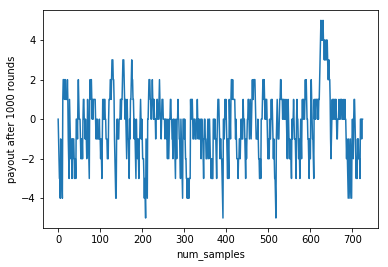

Average payout after 100 rounds is -2.53
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['-', 'S', '-', 'S', '-', '-', '-', 'S', 'H', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['S', '-', 'S', '-', 'H', 'H', '-', 'S', 'H', 'S']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['-', '-', 'S', 'S', '-', '-', 'H', 'H', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         7 | 

In [17]:
plot_result_blackJack(average_payouts,agent)

# Alpha 0.8

In [18]:
envb = BlackjackEnv()
sam = Player('Ani')
envb.add_player(sam)
agent = Agent(envb)
num_rounds = 100
num_samples = 100
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.8, gamma=0.2,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
#plot_result_blackJack(average_payouts,agent)
agent.show_strategy()
# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
#summary(np.sum(rew) , wP, lP, dP)

--------------------------------------------------
Game Number: 1
--------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 1 Round Number: 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 10
Initial state: {'state': {'player_info': {'player_card': [7, 4], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 11}, 'dealer_info': 10}}
Random Init Bet: 1
---------------------
(11, 10, False)
---------------------
Action taken: 0
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [7, 4], 'player_total_balance': 9, 'usable_ace': False, 'player_sum_card': 11}, 'dealer_info': 10}, 'reward': -1.0}
---------------------
(11, 9, False)
---------------------
Balance Left: 9
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Balance Left: 9
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 22 Round Number: 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 9
Initial state: {'state': {'player_info': {'player_card': [3, 1], 'player_total_balance': 9, 'usable_ace': True, 'player_sum_card': 14}, 'dealer_info': 10}}
Random Init Bet: 9
---------------------
(14, 9, True)
---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [3, 1, 10], 'player_total_balance': 0, 'usable_ace': False, 'player_sum_card': 14}, 'dealer_info': 10}, 'reward': 0}
Action taken: 1
State after nth action: {'is_round_done': False, 'state': {'player_info': {'player_card': [3, 1, 10, 2], 'player_total_balance': 0, 'usable_ace': False, 'player_sum_card': 16}, 'dealer_info': 10}, 'reward': 0}
Action taken: 1
player loser, wont 

You are out of money ! Will go to next game !!
--------------------------------------------------
Game Number: 39
--------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 39 Round Number: 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 10
Initial state: {'state': {'player_info': {'player_card': [10, 4], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 14}, 'dealer_info': 8}}
Random Init Bet: 8
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [10, 4, 1], 'player_total_balance': 2, 'usable_ace': False, 'player_sum_card': 15}, 'dealer_info': 8}, 'reward': 0}
Action taken: 0
player loser, wont get back the money, try next round
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 4, 1], 'player_total_balance': 2, 'usable_ace': False, 'player_sum_card': 15}, 'dealer_info': 8}, 'reward'

---------------------
Balance Left: 21
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 59 Round Number: 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 21
Initial state: {'state': {'player_info': {'player_card': [10, 2], 'player_total_balance': 21, 'usable_ace': False, 'player_sum_card': 12}, 'dealer_info': 5}}
Random Init Bet: 5
---------------------
(12, 21, False)
---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [10, 2, 9], 'player_total_balance': 16, 'usable_ace': False, 'player_sum_card': 21}, 'dealer_info': 5}, 'reward': 0}
---------------------
(21, 16, False)
---------------------
Action taken: 0
player winner
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 2, 9], 'player_total_balance': 26, 'usable_ace':

---------------------
(19, 11, False)
---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [10, 9, 1], 'player_total_balance': 1, 'usable_ace': False, 'player_sum_card': 20}, 'dealer_info': 7}, 'reward': 0}
Action taken: 0
player winner
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 9, 1], 'player_total_balance': 21, 'usable_ace': False, 'player_sum_card': 20}, 'dealer_info': 7}, 'reward': 1.0}
Balance Left: 21
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 80 Round Number: 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 21
Initial state: {'state': {'player_info': {'player_card': [6, 4], 'player_total_balance': 21, 'usable_ace': False, 'player_sum_card': 10}, 'dealer_info': 4}}
Random Init Bet: 6
-------------------

---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [3, 3, 7], 'player_total_balance': 8, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info': 3}, 'reward': 0}
Action taken: 0
player winner
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [3, 3, 7], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info': 3}, 'reward': 1.0}
Balance Left: 10
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 96 Round Number: 23
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 10
Initial state: {'state': {'player_info': {'player_card': [7, 10], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 17}, 'dealer_info': 5}}
Random Init Bet: 7
Action taken: 1
player loser, wont get back the money, tr

player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player winner
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the mone

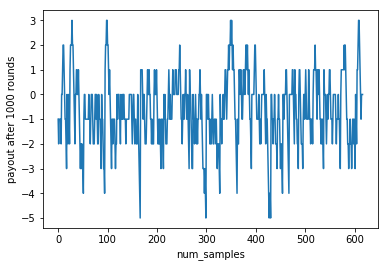

Average payout after 100 rounds is -4.09
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['-', '-', 'S', '-', 'S', '-', '-', 'S', 'S', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['S', 'S', 'H', '-', '-', 'S', 'S', 'H', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['S', 'H', 'S', 'H', '-', '-', 'H', 'H', 'H', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         7 | 

In [19]:
plot_result_blackJack(average_payouts,agent)

# Alpha 0.5

In [20]:
envb = BlackjackEnv()
sam = Player('Ani')
envb.add_player(sam)
agent = Agent(envb)
num_rounds = 100
num_samples = 100
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.5, gamma=0.2,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
#plot_result_blackJack(average_payouts,agent)
agent.show_strategy()
# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
#summary(np.sum(rew) , wP, lP, dP)

--------------------------------------------------
Game Number: 1
--------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 1 Round Number: 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 10
Initial state: {'state': {'player_info': {'player_card': [10, 1], 'player_total_balance': 10, 'usable_ace': True, 'player_sum_card': 21}, 'dealer_info': 7}}
Random Init Bet: 10
---------------------
(21, 10, True)
---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [10, 1, 6], 'player_total_balance': 0, 'usable_ace': False, 'player_sum_card': 17}, 'dealer_info': 7}, 'reward': 0}
---------------------
(17, 0, False)
---------------------
Action taken: 0
Draw match
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 1, 6], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 17}, 

player name: Ani money left: 6
Initial state: {'state': {'player_info': {'player_card': [9, 10], 'player_total_balance': 6, 'usable_ace': False, 'player_sum_card': 19}, 'dealer_info': 1}}
Random Init Bet: 3
Action taken: 1
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [9, 10, 9], 'player_total_balance': 3, 'usable_ace': False, 'player_sum_card': 28}, 'dealer_info': 1}, 'reward': -1}
---------------------
(28, 3, False)
---------------------
Balance Left: 3
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 18 Round Number: 19
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 3
Initial state: {'state': {'player_info': {'player_card': [8, 10], 'player_total_balance': 3, 'usable_ace': False, 'player_sum_card': 18}, 'dealer_info': 2}}
Random Init Bet: 

Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 41 Round Number: 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 7
Initial state: {'state': {'player_info': {'player_card': [1, 4], 'player_total_balance': 7, 'usable_ace': True, 'player_sum_card': 15}, 'dealer_info': 6}}
Random Init Bet: 7
---------------------
(15, 7, True)
---------------------
Action taken: 0
player winner
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [1, 4], 'player_total_balance': 14, 'usable_ace': True, 'player_sum_card': 15}, 'dealer_info': 6}, 'reward': 1.0}
---------------------
(15, 14, True)
---------------------
Balance Left: 14
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 41 Round Number: 3
%%%%%%%

Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 55 Round Number: 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 7
Initial state: {'state': {'player_info': {'player_card': [5, 9], 'player_total_balance': 7, 'usable_ace': False, 'player_sum_card': 14}, 'dealer_info': 8}}
Random Init Bet: 6
Action taken: 1
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [5, 9, 9], 'player_total_balance': 1, 'usable_ace': False, 'player_sum_card': 23}, 'dealer_info': 8}, 'reward': -1}
Balance Left: 1
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 55 Round Number: 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 1


Random Init Bet: 3
---------------------
(12, 4, True)
---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [1, 1, 10], 'player_total_balance': 1, 'usable_ace': False, 'player_sum_card': 12}, 'dealer_info': 8}, 'reward': 0}
Action taken: 1
State after nth action: {'is_round_done': False, 'state': {'player_info': {'player_card': [1, 1, 10, 4], 'player_total_balance': 1, 'usable_ace': False, 'player_sum_card': 16}, 'dealer_info': 8}, 'reward': 0}
Action taken: 1
player loser, wont get back the money, try next round
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [1, 1, 10, 4, 9], 'player_total_balance': 1, 'usable_ace': False, 'player_sum_card': 25}, 'dealer_info': 8}, 'reward': -1}
Balance Left: 1
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 71 Round Num

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 14
Initial state: {'state': {'player_info': {'player_card': [2, 7], 'player_total_balance': 14, 'usable_ace': False, 'player_sum_card': 9}, 'dealer_info': 3}}
Random Init Bet: 1
---------------------
(9, 14, False)
---------------------
Action taken: 0
player winner
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [2, 7], 'player_total_balance': 15, 'usable_ace': False, 'player_sum_card': 9}, 'dealer_info': 3}, 'reward': 1.0}
---------------------
(9, 15, False)
---------------------
Balance Left: 15
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 82 Round Number: 36
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 15
Initial state: {'state': {'player_info': {'player_card': [1, 10], 'player_total_balance': 15, 'usable_ace

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 10
Initial state: {'state': {'player_info': {'player_card': [3, 3], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 6}, 'dealer_info': 5}}
Random Init Bet: 5
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [3, 3, 10], 'player_total_balance': 5, 'usable_ace': False, 'player_sum_card': 16}, 'dealer_info': 5}, 'reward': 0}
Action taken: 1
State after nth action: {'is_round_done': False, 'state': {'player_info': {'player_card': [3, 3, 10, 4], 'player_total_balance': 5, 'usable_ace': False, 'player_sum_card': 20}, 'dealer_info': 5}, 'reward': 0}
Action taken: 0
player winner
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [3, 3, 10, 4], 'player_total_balance': 15, 'usable_ace': False, 'player_sum_card': 20}, 'dealer_info': 5}, 'reward': 1.0}
Balance Left: 15
Round over
-%--%--%--%--%--%--%--%--%

player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get bac

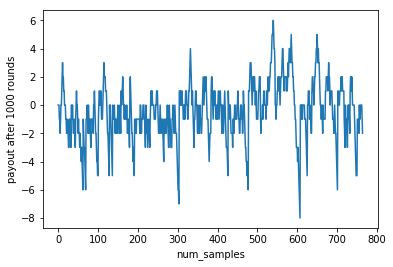

Average payout after 100 rounds is -3.5
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['-', 'H', 'S', '-', '-', 'S', '-', 'S', '-', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['H', 'S', 'S', '-', 'H', '-', '-', 'H', 'S', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['S', 'H', '-', 'S', 'H', '-', 'H', 'S', '-', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         7 | [

In [21]:
plot_result_blackJack(average_payouts,agent)

# Gamma 0.6, Alpha 0.5

In [22]:
envb = BlackjackEnv()
sam = Player('Ani')
envb.add_player(sam)
agent = Agent(envb)
num_rounds = 100
num_samples = 100
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.5, gamma=0.2,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
#plot_result_blackJack(average_payouts,agent)
agent.show_strategy()
# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
#summary(np.sum(rew) , wP, lP, dP)

--------------------------------------------------
Game Number: 1
--------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 1 Round Number: 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 10
Initial state: {'state': {'player_info': {'player_card': [10, 5], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 15}, 'dealer_info': 10}}
Random Init Bet: 6
---------------------
(15, 10, False)
---------------------
Action taken: 1
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 5, 10], 'player_total_balance': 4, 'usable_ace': False, 'player_sum_card': 25}, 'dealer_info': 10}, 'reward': -1}
---------------------
(25, 4, False)
---------------------
Balance Left: 4
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%

-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 19 Round Number: 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 23
Initial state: {'state': {'player_info': {'player_card': [6, 8], 'player_total_balance': 23, 'usable_ace': False, 'player_sum_card': 14}, 'dealer_info': 9}}
Random Init Bet: 4
---------------------
(14, 23, False)
---------------------
Action taken: 0
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [6, 8], 'player_total_balance': 19, 'usable_ace': False, 'player_sum_card': 14}, 'dealer_info': 9}, 'reward': -1.0}
---------------------
(14, 19, False)
---------------------
Balance Left: 19
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Ga

---------------------
(23, 8, False)
---------------------
Balance Left: 8
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 36 Round Number: 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 8
Initial state: {'state': {'player_info': {'player_card': [6, 10], 'player_total_balance': 8, 'usable_ace': False, 'player_sum_card': 16}, 'dealer_info': 4}}
Random Init Bet: 8
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [6, 10, 2], 'player_total_balance': 0, 'usable_ace': False, 'player_sum_card': 18}, 'dealer_info': 4}, 'reward': 0}
Action taken: 1
player loser, wont get back the money, try next round
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [6, 10, 2, 4], 'player_total_balance': 0, 'usable_ace': False, 'player_sum_card': 22}, 'dealer_info':

Game Number: 51 Round Number: 30
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 34
Initial state: {'state': {'player_info': {'player_card': [9, 1], 'player_total_balance': 34, 'usable_ace': True, 'player_sum_card': 20}, 'dealer_info': 10}}
Random Init Bet: 4
---------------------
(20, 34, True)
---------------------
Action taken: 0
Draw match
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [9, 1], 'player_total_balance': 34, 'usable_ace': True, 'player_sum_card': 20}, 'dealer_info': 10}, 'reward': 0.0}
Balance Left: 34
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 51 Round Number: 31
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 34
Initial state: {'state': {'player_info': {'player_card': [10, 1], 'player_total_balance': 34, 'usable_ace': True, 'player_sum_card':

(20, 25, False)
---------------------
Action taken: 0
player winner
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 10], 'player_total_balance': 32, 'usable_ace': False, 'player_sum_card': 20}, 'dealer_info': 9}, 'reward': 1.0}
---------------------
(20, 32, False)
---------------------
Balance Left: 32
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 69 Round Number: 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 32
Initial state: {'state': {'player_info': {'player_card': [4, 5], 'player_total_balance': 32, 'usable_ace': False, 'player_sum_card': 9}, 'dealer_info': 9}}
Random Init Bet: 8
---------------------
(9, 32, False)
---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [4, 5, 2], 'player_total_balance': 24, 'u

State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [5, 3, 6, 3, 1, 10], 'player_total_balance': 7, 'usable_ace': False, 'player_sum_card': 28}, 'dealer_info': 7}, 'reward': -1}
Balance Left: 7
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 94 Round Number: 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 7
Initial state: {'state': {'player_info': {'player_card': [6, 1], 'player_total_balance': 7, 'usable_ace': True, 'player_sum_card': 17}, 'dealer_info': 4}}
Random Init Bet: 4
---------------------
(17, 7, True)
---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [6, 1, 2], 'player_total_balance': 3, 'usable_ace': True, 'player_sum_card': 19}, 'dealer_info': 4}, 'reward': 0}
Action taken: 1
State after nth action: {'is_round

player winner
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get bac

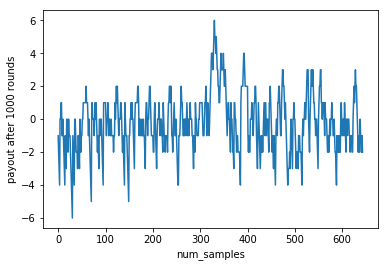

Average payout after 100 rounds is -1.63
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['-', '-', '-', 'H', '-', 'S', 'S', 'S', '-', 'S']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['H', '-', '-', '-', 'S', '-', '-', 'H', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['H', 'S', 'S', '-', '-', '-', '-', 'S', '-', 'S']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         7 | 

In [23]:
plot_result_blackJack(average_payouts,agent)

# Gamma 0.3, Alpha 0.8

In [24]:
envb = BlackjackEnv()
sam = Player('Ani')
envb.add_player(sam)
agent = Agent(envb)
num_rounds = 100
num_samples = 100
num_episodes_to_train = 0.8* num_rounds
# epsilon=1.0, alpha=0.5, gamma=0.2
average_payouts = agent.train(epsilon=1.0, alpha=0.8, gamma=0.3,num_rounds = num_rounds,num_samples = num_samples,num_episodes_to_train=num_episodes_to_train)
#plot_result_blackJack(average_payouts,agent)
agent.show_strategy()
# Test using Learned values
rew,wP,lP,dP = agent.test(1000)
#summary(np.sum(rew) , wP, lP, dP)

--------------------------------------------------
Game Number: 1
--------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 1 Round Number: 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 10
Initial state: {'state': {'player_info': {'player_card': [9, 10], 'player_total_balance': 10, 'usable_ace': False, 'player_sum_card': 19}, 'dealer_info': 7}}
Random Init Bet: 3
---------------------
(19, 10, False)
---------------------
Action taken: 1
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [9, 10, 10], 'player_total_balance': 7, 'usable_ace': False, 'player_sum_card': 29}, 'dealer_info': 7}, 'reward': -1}
---------------------
(29, 7, False)
---------------------
Balance Left: 7
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%

Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 20 Round Number: 23
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 32
Initial state: {'state': {'player_info': {'player_card': [3, 4], 'player_total_balance': 32, 'usable_ace': False, 'player_sum_card': 7}, 'dealer_info': 6}}
Random Init Bet: 6
---------------------
(7, 32, False)
---------------------
Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [3, 4, 6], 'player_total_balance': 26, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info': 6}, 'reward': 0}
---------------------
(13, 26, False)
---------------------
Action taken: 0
player winner
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [3, 4, 6], 'player_total_balance': 38, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 1
Initial state: {'state': {'player_info': {'player_card': [10, 7], 'player_total_balance': 1, 'usable_ace': False, 'player_sum_card': 17}, 'dealer_info': 6}}
You can only bet 1. So betting only 1.
Random Init Bet: 1
Action taken: 0
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 7], 'player_total_balance': 0, 'usable_ace': False, 'player_sum_card': 17}, 'dealer_info': 6}, 'reward': -1.0}
Balance Left: 0
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 30 Round Number: 26
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 0
You are out of money ! Will go to next game !!
--------------------------------------------------
Game Number: 31
------------------------------

Action taken: 1
State after 1st action: {'is_round_done': False, 'state': {'player_info': {'player_card': [8, 4, 3], 'player_total_balance': 8, 'usable_ace': False, 'player_sum_card': 15}, 'dealer_info': 10}, 'reward': 0}
Action taken: 1
player loser, wont get back the money, try next round
State after nth action: {'is_round_done': True, 'state': {'player_info': {'player_card': [8, 4, 3, 10], 'player_total_balance': 8, 'usable_ace': False, 'player_sum_card': 25}, 'dealer_info': 10}, 'reward': -1}
Balance Left: 8
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 47 Round Number: 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 8
Initial state: {'state': {'player_info': {'player_card': [4, 9], 'player_total_balance': 8, 'usable_ace': False, 'player_sum_card': 13}, 'dealer_info': 5}}
Random Init Bet: 8
Action taken: 1
player loser, wont get b

---------------------
(20, 30, False)
---------------------
Balance Left: 30
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 69 Round Number: 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 30
Initial state: {'state': {'player_info': {'player_card': [10, 4], 'player_total_balance': 30, 'usable_ace': False, 'player_sum_card': 14}, 'dealer_info': 10}}
Random Init Bet: 1
---------------------
(14, 30, False)
---------------------
Action taken: 1
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [10, 4, 10], 'player_total_balance': 29, 'usable_ace': False, 'player_sum_card': 24}, 'dealer_info': 10}, 'reward': -1}
---------------------
(24, 29, False)
---------------------
Balance Left: 29
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%

Game Number: 87 Round Number: 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 2
Initial state: {'state': {'player_info': {'player_card': [2, 10], 'player_total_balance': 2, 'usable_ace': False, 'player_sum_card': 12}, 'dealer_info': 5}}
Random Init Bet: 1
Action taken: 0
player loser, wont get back the money, try next round
State after 1st action: {'is_round_done': True, 'state': {'player_info': {'player_card': [2, 10], 'player_total_balance': 1, 'usable_ace': False, 'player_sum_card': 12}, 'dealer_info': 5}, 'reward': -1.0}
Balance Left: 1
Round over
-%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%--%-
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Game Number: 87 Round Number: 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
player name: Ani money left: 1
Initial state: {'state': {'player_info': {'player_card': [7, 10], 'player_total_balance': 1, 'usable_ace': False, 'player_sum_card': 17}, 'dealer_info':

player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player winne

player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money, try next round
player winner
player winner
player loser, wont get back the money, try next round
player loser, wont get back the money,

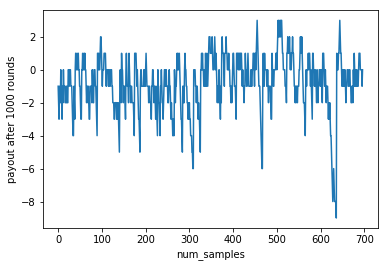

Average payout after 100 rounds is -5.67
 Player's  |       Dealer's upcard when ace is not usable        |         Dealer's upcard when ace is usable         
   Hand    | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'] | ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10']
         1 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         2 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         3 | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         4 | ['H', '-', 'H', '-', '-', 'S', '-', 'S', '-', 'S']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         5 | ['S', '-', '-', '-', 'S', 'S', 'H', 'H', '-', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         6 | ['H', 'S', 'H', 'H', 'H', '-', '-', 'H', 'S', 'H']  | ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
         7 | 

In [25]:
plot_result_blackJack(average_payouts,agent)

# IV - Results

- Describe the choice of your parameters for $\gamma$, $\alpha$, and $\epsilon$. 
  - Run experiments to find good parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs (even from mine.)
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

# V. Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

# Extra Credit for Tournament Top16!

- In two classes, we will have qualification and tournament.
- In qualification game, individual will play against a dealer for one game for 50 round. 
  - Highly ranked (by the profit) and non-broke players will proceed to the tournament.
  - max. 32 players will be cut for main tournament.
- In tournament, 4 players will be play in each round.
  - In a table game, the game lasts until two players broke
  - In final, the game will ends in 50 rounds and winner will be the one with highest balance. 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
35 | Methods | 
 |10| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 | 5| Choice of Function Approximation and Reason
 |10| Implementation of the selected approach (RLAgent)
 | 5| explanation of the codes
45 | Results 
 |10| Reports the selected parameters 
 |15| Experimental outputs that show the choice of parameters. How do you choose them?
 |10| Output plots (5 for each)
 |10| reading and analysis of learning results and plots
10 | Participation to the tournament.
5 | Conclusions 
